In [2]:
import cv2
#help(cv2.HOGDescriptor().detectMultiScale)
import matplotlib.pyplot as plt
import numpy as np
import object_detection #non maximum supression function
import time

def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
image = cv2.imread('humans6.jpg')
resized_image = cv2.resize(image, (100, 50)) 
orig = image.copy()
fig, ax = plt.subplots(1, 1, figsize=(12, 12),
                       subplot_kw=dict(xticks=[], yticks=[]))


ax.imshow(convertToRGB(orig))
ax.set_title('orig image');


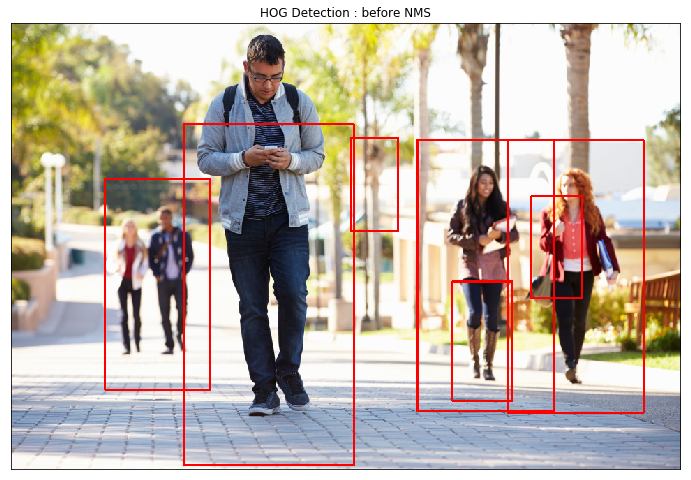

In [145]:
#note time before detection 
t1 = time.time()  
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)

 
# draw the original bounding boxes
for (x, y, w, h) in rects:
	cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
    

#cv2.imshow("Before NMS", orig)
fig, ax = plt.subplots(1, 1, figsize=(12, 12),
                       subplot_kw=dict(xticks=[], yticks=[]))
#ax[0].imshow(orig)
#ax[0].set_title('input image')

ax.imshow(convertToRGB(orig))
ax.set_title('HOG Detection : before NMS');
#ax.set_title('HOG Detection time: ' + str(round(dt1, 3)) + ' secs');

rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = object_detection.non_max_suppression(rects, probs=None, overlapThresh=0.65)
t2 = time.time() 
dt1 = t2 - t1 #

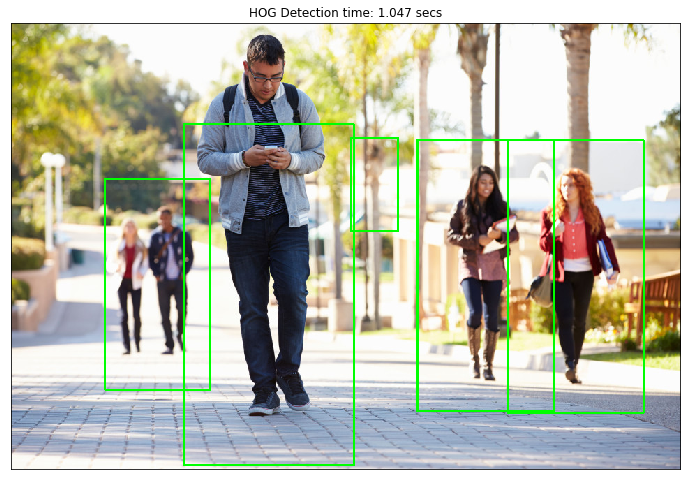

In [146]:
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
	cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)


fig, ax = plt.subplots(1, 1, figsize=(12, 12),
                       subplot_kw=dict(xticks=[], yticks=[]))
#ax[0].imshow(orig)
#ax[0].set_title('input image')

ax.imshow(convertToRGB(image))
ax.set_title('HOG Detection time: ' + str(round(dt1, 3)) + ' secs');